## Importing required packages

In [281]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Defining image path and no. of clusters needed

In [282]:
img_path = 'images/5.png'
clusters = 10 # try changing it

In [283]:
def show(image):
    cv2.imshow('img',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Reading the image, resizing it and flattening it

In [284]:
img = cv2.imread(img_path)
# show(img)
print('Org image shape --> ',img.shape)

rows = 200
cols = int((img.shape[0]/img.shape[1])*rows)

img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)
# show(img)
print('After resizing shape --> ',img.shape)


flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

Org image shape -->  (400, 600, 3)
After resizing shape -->  (133, 200, 3)
After Flattening shape -->  (26600, 3)


### Declaring KMeans Clustering Algorithm for clustering the pixels present in the image.

In [285]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### These are the cluster centers or most dominant colors.

In [286]:
colors = np.array(kmeans.cluster_centers_,dtype='uint')
colors

array([[ 77,  12, 228],
       [ 50, 127,  23],
       [213, 214,  25],
       [ 11, 105, 219],
       [206,  14, 213],
       [237,  50,  49],
       [ 64, 233,  40],
       [ 19,  20, 149],
       [ 22, 232, 188],
       [129,  13,  48]], dtype=uint32)

### Calculating their percentages to sort them accordingly.

In [287]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,colors)
p_and_c = sorted(p_and_c,reverse=True)
p_and_c

[(0.1324812030075188, array([237,  50,  49], dtype=uint32)),
 (0.11548872180451128, array([ 77,  12, 228], dtype=uint32)),
 (0.10981203007518797, array([ 64, 233,  40], dtype=uint32)),
 (0.10601503759398496, array([ 22, 232, 188], dtype=uint32)),
 (0.10563909774436091, array([206,  14, 213], dtype=uint32)),
 (0.10045112781954887, array([ 19,  20, 149], dtype=uint32)),
 (0.09221804511278195, array([ 11, 105, 219], dtype=uint32)),
 (0.08270676691729323, array([ 50, 127,  23], dtype=uint32)),
 (0.08229323308270677, array([213, 214,  25], dtype=uint32)),
 (0.07289473684210526, array([129,  13,  48], dtype=uint32))]

## Visualizing the n (no. of clusters) most dominant colors of the image.

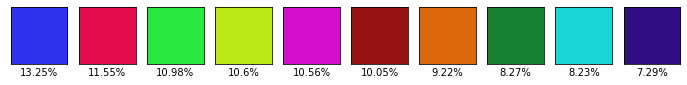

In [288]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

### Creating a bar to visualize the same.

([], [])

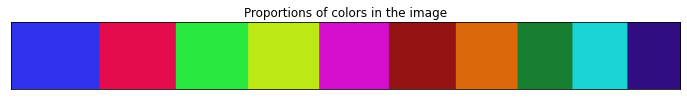

In [289]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

### And in the end just a nice on-image visualization which shows top 5 dominant color on the image.

In [290]:
img = cv2.imread(img_path)

rows = 1000
cols = int((img.shape[0]/img.shape[1])*rows)
img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

cv2.imwrite('output.png',final)
show(final)